In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading the data

In [2]:
!ls ../data/opensubs/

INFO  LICENSE  OpenSubtitles  README


In [3]:
!cat ../data/opensubs/README

 Corpus Name: OpenSubtitles
     Package: OpenSubtitles/xml/en
     Website: http://opus.nlpl.eu/OpenSubtitles-v1.php
     Release: v1
Release date: Sat Mar  3 23:10:02 EET 2018

This corpus is part of OPUS - the open collection of parallel corpora
OPUS Website: http://opus.nlpl.eu

Please cite the following article if you use any part of the corpus in your own work: J. Tiedemann, 2012, Parallel Data, Tools and Interfaces in OPUS. In Proceedings of the 8th International Conference on Language Resources and Evaluation (LREC 2012)

A collection of documents from http://www.opensubtitles.org/.IMPORTANT: If you use the OpenSubtitle corpus, please, add a link to http://www.opensubtitles.org/ to your website and to your reports and publications produced with the data! I got the data under this condition!



In [4]:
!cat ../data/opensubs/INFO

OpenSubtitles/xml/en
OpenSubtitles
v1


In [5]:
#copied (and further altered) from https://github.com/hse-aml/natural-language-processing/blob/master/honor/datasets.py
import xml.etree.ElementTree as ET
import datetime
import os
import sys
import json
import re
import pprint
from tqdm import tqdm
from gzip import GzipFile

class OpensubsData:
    """
    """

    def __init__(self, dirName):
        """
        Args:
            dirName (string): directory where to load the corpus
        """

        # Hack this to filter on subset of Opensubtitles
        # dirName = "%s/en/Action" % dirName

        print("Loading OpenSubtitles conversations in %s." % dirName)
        self.conversations = []
        self.tag_re = re.compile(r'(<!--.*?-->|<[^>]*>)')
        self.conversations = self.loadConversations(dirName)

    def loadConversations(self, dirName):
        """
        Args:
            dirName (str): folder to load
        Return:
            array(question, answer): the extracted QA pairs
        """
        conversations = []
        dirList = self.filesInDir(dirName)
        for filepath in tqdm(dirList, "OpenSubtitles data files"):
            if filepath[-3:]=='xml':
                try:
                    doc = self.getXML(filepath)
                    conversations.extend(self.genList(doc))
                except ValueError:
                    tqdm.write("Skipping file %s with errors." % filepath)
                except:
                    print("Unexpected error:", sys.exc_info()[0])
                    raise
        return conversations

    def getConversations(self):
        return self.conversations

    def genList(self, tree):
        root = tree.getroot()

        timeFormat = '%H:%M:%S'
        maxDelta = datetime.timedelta(seconds=1)

        startTime = datetime.datetime.min
        strbuf = ''
        sentList = []

        for child in root:
            for elem in child:
                if elem.tag == 'time':
                    elemID = elem.attrib['id']
                    elemVal = elem.attrib['value'][:-4]
                    if elemID[-1] == 'S':
                        startTime = datetime.datetime.strptime(elemVal, timeFormat)
                    else:
                        sentList.append((strbuf.strip(), startTime, datetime.datetime.strptime(elemVal, timeFormat)))
                        strbuf = ''
                else:
                    try:
                        strbuf = strbuf + " " + elem.text
                    except:
                        pass

        conversations = []
        for idx in range(0, len(sentList) - 1):
            cur = sentList[idx]
            nxt = sentList[idx + 1]
            if nxt[1] - cur[2] <= maxDelta and cur and nxt:
                tmp = {}
                tmp["lines"] = []
                tmp["lines"].append(self.getLine(cur[0]))
                tmp["lines"].append(self.getLine(nxt[0]))
                conversations.append(tmp)

        return conversations

    def getLine(self, sentence):
        line = {}
        line["text"] = self.tag_re.sub('', sentence).replace('\\\'','\'').strip().lower()
        return line


    def getXML(self, filepath):
        fext = os.path.splitext(filepath)[1]
        if fext == '.gz':
            tmp = GzipFile(filename=filepath)
            return ET.parse(tmp)
        else:
            return ET.parse(filepath)

    def filesInDir(self, dirname):
        result = []
        for dirpath, dirs, files in os.walk(dirname):
            for filename in files:
                fname = os.path.join(dirpath, filename)
                result.append(fname)
        return result

In [6]:
loader = OpensubsData('../data/opensubs/OpenSubtitles/')

Loading OpenSubtitles conversations in ../data/opensubs/OpenSubtitles/.


OpenSubtitles data files:   6%|▌         | 261/4634 [00:07<02:43, 26.78it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Comedy/2003/529_124078_171007_how_to_lose_a_guy_in_10_days.xml with errors.


OpenSubtitles data files:  12%|█▏        | 542/4634 [00:15<02:23, 28.42it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Comedy/2004/2480_226704_299940_little_black_book.xml with errors.


OpenSubtitles data files:  26%|██▋       | 1219/4634 [00:35<01:10, 48.34it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Family/2001/3935_19508_22105_cats__dogs.xml with errors.


OpenSubtitles data files:  37%|███▋      | 1695/4634 [00:45<00:29, 99.49it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Action/2003/602_152466_207871_batoru_rowaiaru_ii_rekuiemu.xml with errors.


OpenSubtitles data files:  43%|████▎     | 1973/4634 [00:50<00:46, 56.71it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Action/2004/59_84873_113518_appurushdo.xml with errors.


OpenSubtitles data files:  61%|██████    | 2827/4634 [01:07<00:26, 67.99it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Drama/2003/1723_68784_89159_big_fish.xml with errors.


OpenSubtitles data files:  64%|██████▍   | 2969/4634 [01:10<00:27, 60.22it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Drama/2004/146_206647_272090_eternal_sunshine_of_the_spotless_mind.xml with errors.


OpenSubtitles data files:  70%|███████   | 3253/4634 [01:16<00:32, 42.03it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Drama/2002/3265_149497_204017_unfaithful.xml with errors.


OpenSubtitles data files:  78%|███████▊  | 3612/4634 [01:24<00:19, 52.75it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Drama/2000/179_88528_119102_batoru_rowaiaru.xml with errors.


OpenSubtitles data files:  94%|█████████▎| 4340/4634 [01:41<00:04, 71.74it/s]

Skipping file ../data/opensubs/OpenSubtitles/xml/en/Horror/1922/1166_134135_184270_nosferatu_eine_symphonie_des_grauens.xml with errors.


OpenSubtitles data files: 100%|██████████| 4634/4634 [01:46<00:00, 43.41it/s]


In [7]:
conversations = loader.getConversations()

In [8]:
len(conversations)

1648080

# EDA and cleaning

In [9]:
all_words = [i['lines'][0]['text'].split(' ') for i in conversations]

/home/volodymyr/envs/convbot_env/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

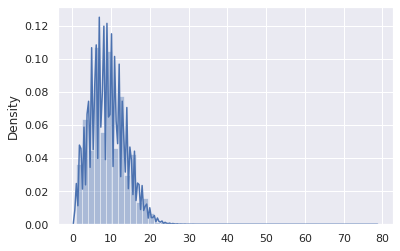

In [10]:
sns.distplot([len(i) for i in all_words])

In [11]:
np.mean([len(i) for i in all_words]), np.median([len(i) for i in all_words])

(9.186791903305664, 9.0)

In [12]:
def count_words(all_words):
    count_dict = {}
    for sentence in tqdm(all_words):
        for word in sentence:
            count = count_dict.get(word,0)
            count_dict.update({word : count+1})
    count_dict = sorted(count_dict.items(), key=lambda x: x[1])[::-1]
    return count_dict

In [13]:
counter = count_words(all_words)

100%|██████████| 1648080/1648080 [00:03<00:00, 415373.97it/s]


In [14]:
len(counter)

118566

In [15]:
len([i for i in counter if i[1]<=5])

81910

In [16]:
[i for i in counter if i[1]<=5][:10]

[('guerriilas', 5),
 ('gpl', 5),
 ('moreland', 5),
 ('spurlock', 5),
 ('jihoh', 5),
 ('tlhingan', 5),
 ('liberalization', 5),
 ('coates', 5),
 ('neocell', 5),
 ('haven´', 5)]

In [17]:
np.mean([len(i['lines']) for i in conversations])

2.0

In [18]:
conversations = [[i['lines'][0]['text'], i['lines'][1]['text']] for i in conversations]

In [19]:
import sys
sys.path.insert(0,'../')
from utils.processing_utils import *

In [20]:
def shortcuts_cleaning(x):
    if any([i.endswith("'") for i in x.split(' ')]):
        x = x.split(' ')
        word = [i for i in x if i.endswith("'")][0]
        idx = x.index(word)
        word = x.pop(idx)
        if idx!=len(x):
            x[idx] = word+x[idx]
        x = ' '.join(x)
        x = shortcuts_cleaning(x)
    else:
        return x
    return x

In [21]:
def clean(conversations):
    new_conversations =  []
    for conversation in tqdm(conversations):
            entries = []
            for entry in conversation:
                #cleaning ... 
                cleaned_conversation = " ".join(i for i in entry.split(' ') if i!='...')
                # adding spaces between numbers
                cleaned_conversation = "".join([" "+i+" " if i.isnumeric() else i for i in cleaned_conversation]).strip()
                # cleaning bad chars
                cleaned_conversation = re.sub(r"[^a-zA-Z0-9(!?.:)']+", " ", cleaned_conversation).strip()

                # removing escapes between 't/'m and actual words 
                cleaned_conversation = shortcuts_cleaning(cleaned_conversation)
                
                # uncovering shortcuts 
                cleaned_conversation = uncover_reduction(cleaned_conversation)
                if cleaned_conversation:
                    entries.append(cleaned_conversation)
                    
            if len(entries)==2:
                new_conversations.append(entries)
                
    return new_conversations

In [22]:
len(conversations)

1648080

In [23]:
conversations = clean(conversations)

100%|██████████| 1648080/1648080 [01:13<00:00, 22430.29it/s]


In [24]:
len(conversations)

1617140

In [25]:
counter = count_words([i[0].split(' ') for i in conversations])

100%|██████████| 1617140/1617140 [00:03<00:00, 456474.00it/s]


In [26]:
len(counter)

102959

In [27]:
len([i for i in counter if i[1]<5])

65342

# adding special tokens

In [28]:
counter = dict(count_words([i[0].split(' ') for i in conversations]))
backup = dict(count_words([i[1].split(' ') for i in conversations]))
for k, v in backup.items():
    counts = counter.get(k,0)
    counter.update({k:counts+v})

100%|██████████| 1617140/1617140 [00:03<00:00, 440968.10it/s]


In [29]:
len(counter)

109705

In [30]:
max_tokens = 50000

In [31]:
rare_tokens, _ = zip(*sorted(counter.items(), key=lambda x: x[1])[::-1][-(len(counter)-max_tokens):])

In [32]:
len(counter), len(rare_tokens)

(109705, 59705)

In [33]:
unk_token = '<unk>'
unk_dict = dict((i,unk_token) for i in rare_tokens)

In [34]:
conversations = replace_in_conversations(conversations, unk_dict)

In [35]:
from collections import Counter
lengths_dialogues = list(map(len,conversations))
Counter(lengths_dialogues)

Counter({2: 1617140})

In [36]:
counter = dict(count_words([i[0].split(' ') for i in conversations]))
backup = dict(count_words([i[1].split(' ') for i in conversations]))
for k, v in backup.items():
    counts = counter.get(k,0)
    counter.update({k:counts+v})

100%|██████████| 1617140/1617140 [00:03<00:00, 451394.64it/s]


In [37]:
counter['<unk>']

139139

In [38]:
unique_tokens = list(counter.keys())

In [39]:
pad_token = '<pad>'
start_token = '<start>'
end_token = '<end>'
token_mapping = {pad_token:0, 
                start_token:1,
                end_token:2,
                unk_token:3}
start_point = 3
for token in unique_tokens:
    if not token_mapping.get(token):
        start_point+=1
        token_mapping.update({token:start_point})

In [40]:
len(token_mapping)

50004

# Creation of embeddings

In [41]:
import gensim
import tqdm

In [42]:
data_path = '../processed_data'
if not os.path.exists(data_path):
    os.mkdir(data_path)

In [52]:
prepared_data = set()
for phrases in tqdm.tqdm(conversations):
    for entry in phrases:
        prepared_data.update([entry])
prepared_data = list([i.split(' ') for i in prepared_data])

100%|██████████| 1617140/1617140 [00:00<00:00, 1667978.64it/s]


In [54]:
from glove import Glove, Corpus

In [55]:
corpus = Corpus()
corpus.fit(prepared_data)
glove = Glove(no_components=100, learning_rate=0.05) 
glove.fit(corpus.matrix, epochs=100, no_threads=6, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 100 training epochs with 6 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99


In [57]:
glove.most_similar('usa')

[('funerals', 0.5210481955466075),
 ('elementary', 0.5091150875500425),
 ('caymans', 0.5079441042491039),
 ('harwich', 0.49851319294051827)]

In [58]:
glove.most_similar('9')

[('7', 0.8340335967724176),
 ('8', 0.8306227766891209),
 ('6', 0.8161687506172369),
 ('1', 0.8159741392414859)]

In [59]:
glove.most_similar('hello')

[('hi', 0.8057899766955682),
 ('darling', 0.6330188353238926),
 ('tom', 0.6242366997075678),
 ('say', 0.6215115751884105)]

In [60]:
glove.most_similar('fuck')

[('hell', 0.7466540894225678),
 ('grond', 0.6809860061818086),
 ('dude', 0.6799619781158673),
 ('shut', 0.6790224622334781)]

In [61]:
tokens = list(glove.dictionary.keys())
print(len(tokens))
glove_vectors = dict([(tokens[idx],vector) for idx, vector in enumerate(glove.word_vectors)])

50001


In [63]:
from utils.embeddings_utils import *

In [64]:
tokens_embs, missing = get_emb_rep_glove(list(token_mapping.keys()), glove_vectors)

100%|██████████| 50004/50004 [00:00<00:00, 1022823.37it/s]

3 words where absent in embedding


In [65]:
final_embeddings = create_embeddings(tokens_embs, token_mapping, pad_token)

In [66]:
with open(os.path.join(data_path,'glove_embeddings_trained_opensubs.npy'), 'wb') as f:
    np.save(f, final_embeddings)

with open(os.path.join(data_path,'missing_in_glove_trained_opensubs.npy'), 'wb') as f:
    np.save(f, missing)


# saving out

In [67]:

with open(os.path.join(data_path,'token_mapping_opensubs.json'), 'w') as f:
    json.dump(token_mapping, f)

with open(os.path.join(data_path,'data_opensubs.npy'), 'wb') as f:
    np.save(f, conversations)  